<a href="https://colab.research.google.com/github/Judykimani1/cord19_smoking_agent/blob/main/Smoking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ü¶† COVID & Smoking QnA Agent

This notebook will:

1. Install dependencies  
2. Download & extract CORD-19  
3. Filter by keywords & clean  
4. Extend with WHO COVID-19 data  
5. Keyword extraction & visualization  
6. Chunking, embeddings & FAISS index  
7. Gradio chatbot interface  
8. **Option A**: Validation tests  
9. **Option B**: Model-extension (NER & Sentiment)  


In [ ]:
# Install required libraries
!pip install llama-index llama-index-embeddings-huggingface llama-index-llms-huggingface bitsandbytes \
            gradio keybert sentence-transformers faiss-cpu transformers wordcloud

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.0/67.0 MB 34.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 54.2/54.2 MB 43.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 323.1/323.1 kB 27.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 41.4/41.4 kB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31.3/31.3 MB 73.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

## 2. Imports & Helpers

In [ ]:
import os
import re
import pandas as pd
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from IPython.display import Image, display
from tqdm import tqdm

In [ ]:
# LlamaIndex imports
from llama_index.core import Settings, Document, StorageContext, VectorStoreIndex, load_index_from_storage
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.llms.huggingface import HuggingFaceLLM
from llama_index.core.memory import ChatMemoryBuffer

## 3. Download & Extract CORD-19 (July 2020)

In [ ]:
# Upload
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_path = "/content/drive/My Drive/filtered_cord19_text_sha.csv"
if os.path.exists(df_path):
    df = pd.read_csv(df_path)
else:
    raise FileNotFoundError("Please upload 'filtered_cord19_text_sha.csv' to your Google Drive.")
df.head()

sha  \
0  00624a8e79f31fccd9cc02ac643e8481d78898af   
1  00eaa28403c40a1892c493a5ca2df4ac1e6896f8   
2  00ec6e927034a7b70159a09a6e54b74d08ac03c8   
3  012df38102699db78d83961b6dcb2c1138c810c1   
4  0144d88cb339012dc1a4b29bbd72962e528baf92   

                                                text  
0  A new coronavirus, named SARS-CoV-2 by the Wor...  
1  With the outbreak of the COVID-19 pandemia, ro...  
2  COVID19 and acute lymphoblastic leukemias of c...  
3  The SARS-CoV-2 pandemic is unprecedented in ou...  
4  The unprecedented health care scenario caused ...

# 4. FILTER SMOKING-RELATED ABSTRACTS

In [ ]:
smoking_keywords = ['smoking','smoke','tobacco','nicotine','cigarette','vaping','e-cigarette','secondhand']
covid_keywords   = ['covid','covid-19','coronavirus','sars-cov-2']
cancer_keywords  = ['lung cancer','cancer','tumor','carcinoma']
ALL_TERMS = smoking_keywords + covid_keywords + cancer_keywords
pattern = re.compile(r"\b(" + "|".join(map(re.escape, ALL_TERMS)) + r")\b", re.IGNORECASE)

In [ ]:
def contains_terms(text: str) -> bool:
    if pd.isna(text): return False
    return bool(pattern.search(text))

def clean_text(text: str) -> str:
    if not isinstance(text, str): return ""
    return re.sub(r"\[.*?\]|\s+", " ", text).strip()

# 5. FILTER & CLEAN THE CORD19 SLICE

In [ ]:
df['text'] = df['text'].astype(str)
filtered = df[df['text'].apply(contains_terms)].copy()
filtered['clean_text'] = filtered['text'].apply(clean_text)
print(f"[INFO] Filtered abstracts: {len(filtered):,} rows")

[INFO] Filtered abstracts: 1,492 rows


# 6. EXTEND WITH GPE DATASET
## Spatial Data for CORD-19 (COVID-19 ORDC)

Locations (GPE or LOC only) were extracted from CORD-19 full text articles [2020-03-20 release] using spaCy. The results were then geocoded with ArcGIS Online. In its current form, this data is uncleaned.

This dataset was produced by Charlie Harper and Ben Gorham of The Freedman Center for Digital Scholarship (Kelvin Smith Library) at Case Western Reserve University and made use of the High Performance Computing Resource in the Core Facility for Advanced Research Computing at Case Western Reserve University.

In [ ]:
gpe_path = "/content/drive/My Drive/gpe_or_loc_in_body.csv"
df_extended = pd.read_csv(gpe_path)
df_extended.head(4)

sha             ner  \
0  0015023cc06b5362d332b3baf348d11567ca2fbb              PK   
1  004f0f8bb66cf446678dc13cf2701feec4f36d76           China   
2  004f0f8bb66cf446678dc13cf2701feec4f36d76           Wuhan   
3  004f0f8bb66cf446678dc13cf2701feec4f36d76  Hubei Province   

                                            sentence  sentence_start  \
0  This is consistent with our earlier report des...             351   
1  The 2019-nCoV epidemic has spread across China...               0   
2  The mass quarantine measure implemented in the...              21   
3  The mass quarantine measure implemented in the...              21   

   sentence_end source_x                                              title  \
0           374  biorxiv  The RNA pseudoknots in foot-and-mouth disease ...   
1            21  medrxiv  Healthcare-resource-adjusted vulnerabilities t...   
2            56  medrxiv  Healthcare-resource-adjusted vulnerabilities t...   
3            56  medrxiv  Healthcare-resource-adjusted vulnerabilities t...   

                           doi  license  \
0    10.1101/2020.01.10.901801  biorxiv   
1  10.1101/2020.02.11.20022111  medrvix   
2  10.1101/2020.02.11.20022111  medrvix   
3  10.1101/2020.02.11.20022111  medrvix   

                                            abstract publish_time  \
0  The positive stranded RNA genomes of picornavi...   2020-01-11   
1  We integrate the human movement and healthcare...   2020-02-12   
2  We integrate the human movement and healthcare...   2020-02-12   
3  We integrate the human movement and healthcare...   2020-02-12   

                                             authors journal  
0  Ward, J. C. J.; Lasecka-Dykes, L.; Neil, C.; A...     NaN  
1  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...     NaN  
2  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...     NaN  
3  Hanchu Zhou; Jianan Yang; Kaichen Tang; Qingpe...     NaN

In [ ]:
if not os.path.exists(gpe_path):
    print("[WARNING] GPE dataset not found; skipping extension")
    extended = filtered.copy()
else:
    gpe = pd.read_csv(gpe_path)

    # 2) If you didn‚Äôt have 'clean_abstract' originally, create it now:
    if "clean_abstract" not in gpe.columns:
        gpe["clean_abstract"] = gpe["abstract"].apply(clean_text)

    # 3) Select all the columns you actually need:
    keep_cols = ["sha", "title", "abstract", "clean_abstract", "doi", "publish_time"]
    gpe = gpe[[c for c in keep_cols if c in gpe.columns]].copy()

    # 4) Now filter & merge exactly as before:
    gpe = gpe[gpe["abstract"].apply(contains_terms)].copy()
    print(f"[INFO] GPE-filtered: {len(gpe):,} rows")

    extended = pd.concat([filtered, gpe], ignore_index=True)
    extended = extended.drop_duplicates(subset=["doi","sha"], keep="first")
    print(f"[INFO] Extended dataset: {len(extended):,} rows")


[INFO] GPE-filtered: 95,351 rows
[INFO] Extended dataset: 6,324 rows


In [ ]:
extended.to_csv("/content/drive/My Drive/extended_metadata.csv", index=False)

In [ ]:
extended.tail(10)

sha text clean_text  \
96625  fab32444594a7c25009ffcd48e91c923f5f0316f  NaN        NaN   
96639  faec4bca24cb275ebc6c55e7cba3bd6a3b74df32  NaN        NaN   
96641  fb02396b27e7eba6cd6e52fec15c040a98cc0d48  NaN        NaN   
96710  fc363739ad7ec8d796aba6af478d986a4c0f5f3f  NaN        NaN   
96717  fc7c462f4b3c1a7e4ab9cf9d7be29353a8595a8c  NaN        NaN   
96720  fce3506fcb7fa163babc7f4e959283ecbe346bc9  NaN        NaN   
96732  fe2b70a4317057c021120d2281f2d7796c742e86  NaN        NaN   
96763  fef0bb9eaac69559d0ff2f92ff83e0affd4435f0  NaN        NaN   
96767  ff2ac3737c6edf81ff29b8d72c3abc2b3df5b344  NaN        NaN   
96820  ff5a79ed22ea416e6d89caad1cf0d83dbc741a4b  NaN        NaN   

                                                   title  \
96625  The imperative to develop a human vaccine for ...   
96639      Expression and role of HEPIS in breast cancer   
96641  Descriptive epidemiology and characteristics o...   
96710  Neonatal infections in Saudi Arabia: Associati...   
96717  Human Coronavirus EMC Is Not the Same as Sever...   
96720  Middle East Respiratory Syndrome Coronavirus S...   
96732  Inhibition of Triggering Receptor Expressed on...   
96763  Pathogenic Influenza Viruses and Coronaviruses...   
96767  Current perspectives in transfusion-transmitte...   
96820          Understanding Human Coronavirus HCoV-NL63   

                                                abstract  \
96625  The Hendra virus (HeV) poses a significant cha...   
96639  Human embryo lung cellular protein interacting...   
96641  BACKGROUND AND OBJECTIVES: Describe the epidem...   
96710  In recent years, many studies have reported po...   
96717  A newly identified betacoronavirus, human coro...   
96720  Since the first imported case of Middle East r...   
96732  Alcoholic liver disease (ALD) is characterized...   
96763  The broad range and diversity of interferon-st...   
96767  BACKGROUND: In August 2009, a group from the A...   
96820  Even though coronavirus infection of humans is...   

                                          clean_abstract  \
96625  The Hendra virus (HeV) poses a significant cha...   
96639  Human embryo lung cellular protein interacting...   
96641  BACKGROUND AND OBJECTIVES: Describe the epidem...   
96710  In recent years, many studies have reported po...   
96717  A newly identified betacoronavirus, human coro...   
96720  Since the first imported case of Middle East r...   
96732  Alcoholic liver disease (ALD) is characterized...   
96763  The broad range and diversity of interferon-st...   
96767  BACKGROUND: In August 2009, a group from the A...   
96820  Even though coronavirus infection of humans is...   

                                doi  publish_time  
96625          10.3402/iee.v5.29619   2015 Oct 29  
96639         10.3892/ol.2019.10993   2019 Dec 17  
96641    10.5144/0256-4947.2015.203  2015 May-Jun  
96710       10.5114/ceji.2015.50836   2015 Apr 22  
96717         10.1128/mBio.00002-13   2013 Jan 15  
96720  10.3346/jkms.2015.30.11.1701   2015 Nov 16  
96732             10.1002/hep4.1269   2018 Oct 29  
96763         10.1128/mBio.01174-14   2014 May 20  
96767            10.1111/voxs.12070   2014 Jul 28  
96820   10.2174/1874357901004010076   2010 May 25

In [ ]:
# if you also have a `full_text` JSON load, you could do:
extended["abstract"] = extended["abstract"].fillna(extended["text"])

In [ ]:
import json
from pathlib import Path

def load_full_text(sha):
    p = Path("data/document_parses/json_files") / f"{sha}.json"
    if not p.exists():
        return None
    js = json.loads(p.read_text())
    # join all body_text paragraphs
    return " ".join([sec["text"] for sec in js.get("body_text", [])])

# apply only to rows where abstract is NaN
mask = extended["abstract"].isna()
extended.loc[mask, "abstract"] = extended.loc[mask, "sha"].apply(load_full_text)

In [ ]:
extended["abstract"] = extended["abstract"].fillna("")
extended = extended.dropna(subset=["abstract"]).reset_index(drop=True)

In [ ]:
extended["clean_abstract"] = extended["abstract"].apply(clean_text)

In [ ]:
extended = extended.drop(columns=['doi', 'publish_time', 'title'])

In [ ]:
extended.head(10)

sha  \
0  00624a8e79f31fccd9cc02ac643e8481d78898af   
1  00eaa28403c40a1892c493a5ca2df4ac1e6896f8   
2  00ec6e927034a7b70159a09a6e54b74d08ac03c8   
3  012df38102699db78d83961b6dcb2c1138c810c1   
4  0144d88cb339012dc1a4b29bbd72962e528baf92   
5  017fa72e2ab985213af241fd27da200b57a2ff95   
6  01875a437a28422a2b857efab9d5c4b113bcdfbb   
7  0197f22ffbd2d32a556d4c2490fa2c72583faef5   
8  01f7ebedfcedde79ac1595a1561fa2e735a76622   
9  02049ffbdb20997055c4def3516af0e6e40dd427   

                                                text  \
0  A new coronavirus, named SARS-CoV-2 by the Wor...   
1  With the outbreak of the COVID-19 pandemia, ro...   
2  COVID19 and acute lymphoblastic leukemias of c...   
3  The SARS-CoV-2 pandemic is unprecedented in ou...   
4  The unprecedented health care scenario caused ...   
5  The COVID-19 pandemic is impacting all urologi...   
6  Bispecific monoclonal antibodies (BsMAb) are u...   
7  Aims: It is important to identify characterist...   
8  There are growing concerns that the UK COVID-1...   
9  ADAR1 isoforms are adenosine deaminases that e...   

                                          clean_text  \
0  A new coronavirus, named SARS-CoV-2 by the Wor...   
1  With the outbreak of the COVID-19 pandemia, ro...   
2  COVID19 and acute lymphoblastic leukemias of c...   
3  The SARS-CoV-2 pandemic is unprecedented in ou...   
4  The unprecedented health care scenario caused ...   
5  The COVID-19 pandemic is impacting all urologi...   
6  Bispecific monoclonal antibodies (BsMAb) are u...   
7  Aims: It is important to identify characterist...   
8  There are growing concerns that the UK COVID-1...   
9  ADAR1 isoforms are adenosine deaminases that e...   

                                            abstract  \
0  A new coronavirus, named SARS-CoV-2 by the Wor...   
1  With the outbreak of the COVID-19 pandemia, ro...   
2  COVID19 and acute lymphoblastic leukemias of c...   
3  The SARS-CoV-2 pandemic is unprecedented in ou...   
4  The unprecedented health care scenario caused ...   
5  The COVID-19 pandemic is impacting all urologi...   
6  Bispecific monoclonal antibodies (BsMAb) are u...   
7  Aims: It is important to identify characterist...   
8  There are growing concerns that the UK COVID-1...   
9  ADAR1 isoforms are adenosine deaminases that e...   

                                      clean_abstract  
0  A new coronavirus, named SARS-CoV-2 by the Wor...  
1  With the outbreak of the COVID-19 pandemia, ro...  
2  COVID19 and acute lymphoblastic leukemias of c...  
3  The SARS-CoV-2 pandemic is unprecedented in ou...  
4  The unprecedented health care scenario caused ...  
5  The COVID-19 pandemic is impacting all urologi...  
6  Bispecific monoclonal antibodies (BsMAb) are u...  
7  Aims: It is important to identify characterist...  
8  There are growing concerns that the UK COVID-1...  
9  ADAR1 isoforms are adenosine deaminases that e...

# 7. VALIDATION REPORT & BASIC VIZ

In [ ]:
report = {
    "original_rows": len(df),
    "filtered_rows": len(filtered),
    "gpe_rows": len(gpe),
    "extended_rows": len(extended),
    "null_abstracts": filtered['text'].isna().sum(),
    "avg_length": filtered['text'].str.split().map(len).mean()
}
pd.DataFrame([report]).to_csv("/content/drive/My Drive/validation_report.csv", index=False)
display(pd.DataFrame([report]).T)

0
original_rows    1507.000000
filtered_rows    1492.000000
gpe_rows        95351.000000
extended_rows    6324.000000
null_abstracts      0.000000
avg_length       2588.671582

In [ ]:
# Keyword frequency plot
freq = {term: extended['abstract'].str.contains(term, case=False).sum() for term in ALL_TERMS}
plt.figure(figsize=(10,4))
sns.barplot(x=list(freq.keys()), y=list(freq.values()))
plt.xticks(rotation=45, ha='right')
plt.title("Term Frequency")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/term_frequency.png")
plt.close()

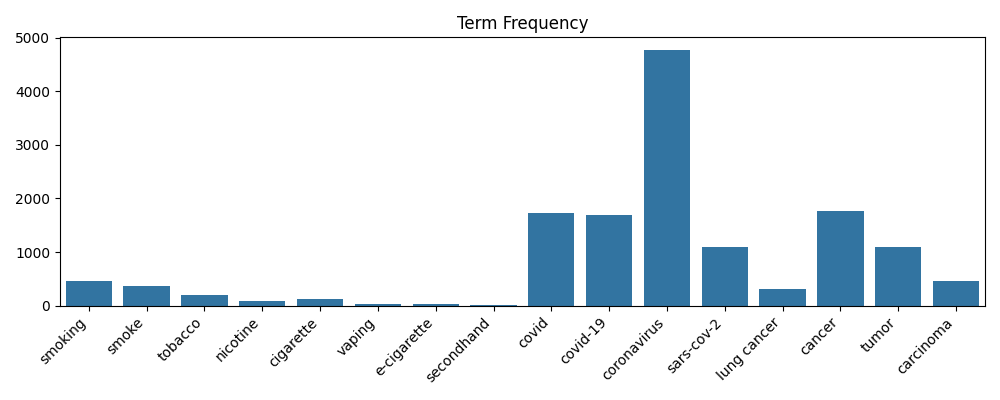

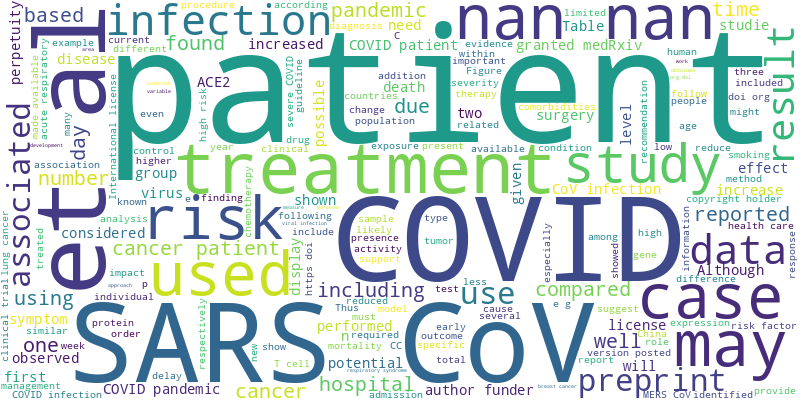

In [ ]:
# Wordcloud of extended abstracts
wc = WordCloud(width=800, height=400, background_color="white")
extended['text'] = extended['text'].astype(str).fillna('')
wc.generate(" ".join(extended['text']))
wc.to_file("/content/drive/My Drive/wordcloud.png")
display(Image("/content/drive/My Drive/term_frequency.png"))
display(Image("/content/drive/My Drive/wordcloud.png"))

# 8. KEYWORD EXTRACTION WITH KeyBERT

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT("distilbert-base-nli-mean-tokens")

In [ ]:
all_kws = []
extended['clean_text'] = extended['clean_text'].fillna('')
for txt in tqdm(extended['clean_text'], desc="Extracting keywords (GPU)"):
    kws = [k for k,_ in kw_model.extract_keywords(txt, top_n=3)]
    all_kws.extend(kws)

Extracting keywords (GPU): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6324/6324 [05:03<00:00, 20.82it/s]


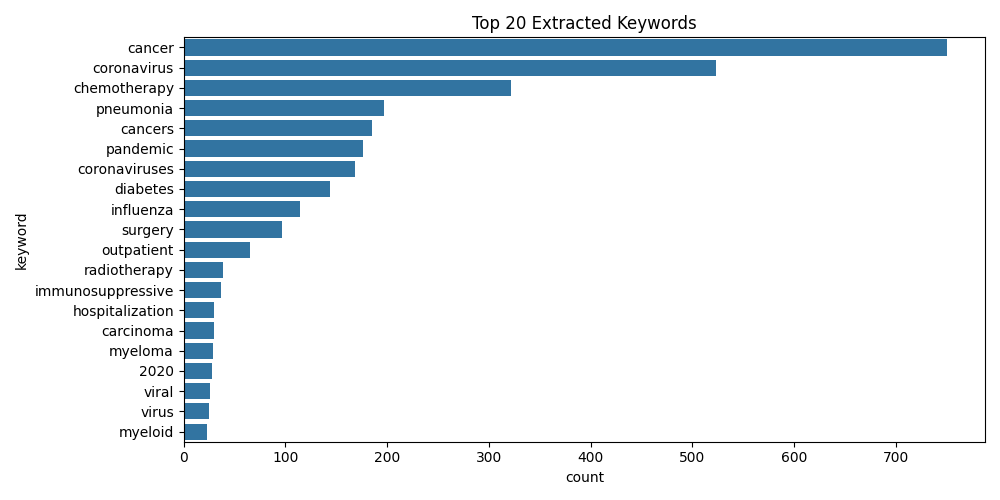

In [ ]:
top20 = Counter(all_kws).most_common(20)
kw_df = pd.DataFrame(top20, columns=['keyword','count'])
kw_df.to_csv("/content/drive/My Drive/top_keywords.csv", index=False)
plt.figure(figsize=(10,5))
sns.barplot(x='count', y='keyword', data=kw_df)
plt.title("Top 20 Extracted Keywords")
plt.tight_layout()
plt.savefig("/content/drive/My Drive/top_keywords.png")
plt.close()
display(Image("/content/drive/My Drive/top_keywords.png"))

# 9. CHUNK ABSTRACTS FOR INDEXING

In [ ]:
embed_model = HuggingFaceEmbedding(
    model_name="pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb",
    device="cuda"
)
Settings.embed_model = embed_model

In [ ]:
chunks = []
for txt in tqdm(extended['clean_text'], desc="Chunking"):
    words = txt.split()
    for i in range(0, len(words), 150):
        chunk = " ".join(words[i:i+150])
        chunks.append(Document(text=chunk))

print(f"[INFO] Created {len(chunks):,} chunks")

Chunking: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6324/6324 [00:01<00:00, 4217.72it/s]

[INFO] Created 26,224 chunks


In [ ]:
index = VectorStoreIndex.from_documents(chunks, show_progress=True, insert_batch_size=len(chunks))
index.storage_context.persist(persist_dir="storage")

Parsing nodes:   0%|          | 0/26224 [00:00<?, ?it/s]

Generating embeddings:   0%|          | 0/26224 [00:00<?, ?it/s]

# 9. QUERY EXAMPLE

In [ ]:
storage = StorageContext.from_defaults(persist_dir="storage")
index = load_index_from_storage(storage)

In [ ]:
from llama_index.llms.huggingface import HuggingFaceLLM

# 1. Create your HF LLM
hf_llm = HuggingFaceLLM(
    model_name="colesmcintosh/Llama-3.2-1B-Instruct-Mango",
    tokenizer_name="colesmcintosh/Llama-3.2-1B-Instruct-Mango",
    context_window=2048,
    max_new_tokens=256,
    device_map="cuda:0",
    generate_kwargs={"temperature":0.7, "do_sample":True},
)

# 2. Build the query engine with the LLM instance directly
query_engine = index.as_query_engine(
    similarity_top_k=10,
    llm=hf_llm # Pass the hf_llm instance directly
)

# 3. Run your query
response = query_engine.query("What are the effects of smoking.")
print(response.response)

adapter_config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

 Smuggling smoking is associated with an increased risk of COVID-19 infection. Smoking is known to cause lung damage through the activation of inflammatory cytokines and programmed cell death in the pulmonary tissue and direct actions on circulating immune cells such as T cell.  Nicotine is a known carcinogen that can cause lung cancer. In addition to smoking, e-cigarettes, tobacco, and secondhand smoke are also known to cause respiratory problems such as asthma and COPD. In fact, studies have shown that smoking is associated with increased ACE2 expression in the lung, which may underlie enhanced exposure to the SARS-CoV-2 spike protein, and that smoking is also associated with increased mortality rate among smokers with COVID-19 infections. 14.4% of patients with COVID-19 were found to be smokers, and 15.3% of patients were found to be former smokers who used NRT. 17.7% of patients were found to be former smokers who used e-cigarettes. 15.6% of patients were found to be former smokers

# 10. BUILD CHAT ENGINE & LAUNCH GRADIO

In [ ]:
Settings.llm = hf_llm

In [ ]:
chat_engine = index.as_chat_engine(
    chat_mode="context",
    memory=ChatMemoryBuffer.from_defaults(token_limit=32000),
    system_prompt=(
        "You are a medical chatbot specialized in answering questions about Smoking, COVID-19, "
        "lung cancer, and related topics. Provide factual, safe responses based on the data."
    ),
    llm=hf_llm
)

# 11.  NER & SENTIMENT ANNOTATION

In [ ]:
from transformers import pipeline

# 1. Initialize the NER pipeline
ner = pipeline(
    task="ner",
    model="d4data/biomedical-ner-all",
    tokenizer="d4data/biomedical-ner-all",
    grouped_entities=True,
    device=0
)

config.json:   0%|          | 0.00/5.00k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/266M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


In [ ]:
# 2. Updated chat function that annotates the generated answer
def chat_fn_with_ner(user_input, history=[]):
    # Get the response from the chat engine
    result = chat_engine.chat(user_input)
    answer = result.response

    # Run NER on the answer
    entities = ner(answer)

    # Append to chat history
    history.append((user_input, answer))

    # Return updated history and NER entities
    return history, history, entities

üß† COVID & Smoking QnA Chatbot

This Gradio-based app allows users to ask medical questions related to COVID-19, smoking, and lung cancer. It features:

‚úÖ LLM-powered chatbot (Llama 3.2 1B Mango)

‚úÖ Named Entity Recognition (Biomedical NER)

‚úÖ Sentiment Analysis (on user & bot text)

‚úÖ Model dropdown for future extensibility

In [ ]:
from transformers import pipeline
import gradio as gr

# 1. Initialize NER and Sentiment Analysis Pipelines
ner_pipeline = pipeline(
    task="ner",
    model="d4data/biomedical-ner-all",
    tokenizer="d4data/biomedical-ner-all",
    grouped_entities=True,
    device=0
)

sentiment_pipeline = pipeline(
    task="sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english",  # Or replace with a medical sentiment model
    tokenizer="distilbert-base-uncased-finetuned-sst-2-english",
    device=0
)

# 2. Chat function with NER and Sentiment Analysis
def full_chat_fn(user_input, history=[]):
    # Get response from chat engine
    result = chat_engine.chat(user_input)
    answer = result.response

    # Run NER on the generated answer
    ner_results = ner_pipeline(answer)

    # Run Sentiment Analysis on the answer
    sentiment_results = sentiment_pipeline(answer)

    # Append to chat history
    history.append((user_input, answer))

    return history, history, ner_results, sentiment_results

# 3. Gradio Wrapper
def wrapped_chat(user_input, history):
    return full_chat_fn(user_input, history)

# 4. Interface Definition
chatbot = gr.Chatbot(label="üß† Medical Chat")
state   = gr.State([])

iface = gr.Interface(
    fn=wrapped_chat,
    inputs=[gr.Textbox(lines=2, label="Your Question", placeholder="e.g., What are the effects of smoking on COVID-19 patients?"), state],
    outputs=[
        chatbot,                 # Updated chat history
        state,                   # Stateful memory
        gr.JSON(label="üî¨ Named Entities"),
        gr.JSON(label="‚ù§Ô∏è Sentiment Analysis")
    ],
    title="ü¶† COVID & Smoking QnA Agent",
    description="Ask about COVID-19, smoking, lung cancer, or related medical topics. Output includes NER and sentiment insights."
)

iface.launch()


Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-75-5a9adc2a824f>:42: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot(label="üß† Medical Chat")


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8ef2d70a2d60708ae6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
